In [ ]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 133.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import cv2
from ultralytics import YOLO
from PIL import ImageFont, ImageDraw, Image
from IPython.display import display
import numpy as np
import matplotlib.font_manager as fm

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Yolo11m

In [ ]:
model = YOLO("yolov11m.pt")

### Train with all augmentations disabled (Baseline)

In [ ]:
model.train(
    data="/content/dataset/4-masked-split-no-leak/data.yaml",
    epochs=100,
    imgsz=640,
    batch=64,
    device=0,
    workers=2,

    # Disable all augmentations
    augment=False,
    hsv_h=0.0,
    hsv_s=0.0,
    hsv_v=0.0,
    degrees=0.0,
    translate=0.0,
    scale=0.0,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.0,
    bgr=0.0,
    mosaic=0.0,
    mixup=0.0,
    cutmix=0.0,
    auto_augment=None,
    erasing=0.0,

    project="yolo-care-symbols",
    name="care-symbols-yolo11m-v2"
)

### Train with optimal set of augmentations

In [5]:
model.train(
    data="/content/dataset/4-masked-split-no-leak/data.yaml",
    epochs=200,   # more epochs to help with small objects
    imgsz=640,
    batch=64,
    device=0,
    workers=2,    # fewer workers for Colab

    warmup_epochs=3,          # helps early training stability
    close_mosaic=10,          # keep mosaic longer (helps small object training)
    mosaic=1.0,               # keep mosaic enabled
    hsv_h=0.0, hsv_s=0.0, hsv_v=0.0,  # disable color augmentation (grayscale images)
    flipud=0.0, fliplr=0.5,           # left-right flips only
    perspective=0.0,                  # disable perspective warp (symbols are flat)
    pretrained=True,

    name="care-symbols-yolov11m-v5",
    project="yolo-care-symbols"
)

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/4-masked-split-no-leak/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0, hsv_s=0.0, hsv_v=0.0, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=care-symbols-yolov11m-v5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

In [4]:
model.val(data="/content/dataset/data.yaml")

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11m summary (fused): 125 layers, 20,040,826 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1325.8±283.6 MB/s, size: 55.5 KB)
val: Scanning /content/dataset/4-masked-split-no-leak/valid/labels.cache... 216 images, 0 backgrounds, 0 corrupt: 100%|██████████| 216/216 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [00:04<00:00, 51.25it/s]
                   all        216       1293      0.823       0.86      0.909      0.714
                   30C         74         86      0.633      0.837      0.835      0.651
                   40C         77        101      0.655      0.683      0.768      0.599
             DN_bleach        189        255      0.942      0.956      0.984      0.789
          DN_dry_clean         86        155      0.945      0.974      0.975      

### Test Model Outptut

In [ ]:
model = YOLO("/content/drive/MyDrive/colab-data/yolo-care-symbols/care-symbols-yolo11m-v5/care-symbols-yolov11m-v5/weights/best.pt")

# Load the image (original)
image_path = '/content/dataset/4-masked-split-no-leak/valid/images/39_jpg.rf.4be0c80568ac34ed7b725ad43f4a1e48.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_h, img_w = image.shape[:2]

results = model(image_path)


image 1/1 /content/dataset/4-masked-split-no-leak/valid/images/39_jpg.rf.4be0c80568ac34ed7b725ad43f4a1e48.jpg: 640x640 1 40C, 1 DN_bleach, 1 iron_low, 1 normal_dry_clean_solvents, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


### Function to interpret model output and draw bounding boxes

In [ ]:
def draw_YOLO_boxes(image, results):
    # Extract bounding boxes, scores, and class IDs
    boxes = np.array([box.xyxy[0].cpu().numpy() for box in results[0].boxes])
    class_ids = np.array([int(box.cls[0].item()) for box in results[0].boxes])

    image_pil = Image.fromarray(image).convert("RGBA")
    draw = ImageDraw.Draw(image_pil)
    font_path = fm.findfont("DejaVu Sans")
    font_box = ImageFont.truetype(font_path, 20)
    font_legend = ImageFont.truetype(font_path, 20)

    box_color = (255, 0, 0, 255)       # Red
    text_color = (255, 255, 255, 255)  # White
    detected_classes = set()

    for box, cls in zip(boxes, class_ids):
        x1, y1, x2, y2 = map(int, box)
        label = str(cls)
        detected_classes.add(cls)

        # Draw rectangle
        draw.rectangle([x1, y1, x2, y2], outline=box_color, width=3)

        # Draw label background and text
        text_size = draw.textbbox((0, 0), label, font=font_box)
        w, h = text_size[2] - text_size[0], text_size[3] - text_size[1]
        pad = 2
        draw.rectangle([x1, y1 - h - 2 * pad, x1 + w + 2 * pad, y1], fill=box_color)
        draw.text((x1 + pad, y1 - h - 2*pad), label, font=font_box, fill=text_color)

    # Draw transparent legend
    sorted_classes = sorted(detected_classes)
    legend_texts = [f"{i}: {model.names[i]}" for i in sorted_classes]
    line_height = font_legend.getbbox("Ay")[3] + 6
    padding = 6
    legend_width = max(ImageDraw.Draw(Image.new("RGB", (1, 1))).textlength(t, font=font_legend) for t in legend_texts) + 2 * padding
    legend_height = len(legend_texts) * line_height + 2 * padding
    start_x = 10
    start_y = image_pil.height - legend_height - 10

    overlay = Image.new("RGBA", image_pil.size, (0, 0, 0, 0))
    draw_overlay = ImageDraw.Draw(overlay)

    draw_overlay.rectangle(
        [start_x, start_y, start_x + legend_width, start_y + legend_height],
        fill=(0, 0, 0, 180)
    )

    for i, cls_id in enumerate(sorted_classes):
        text = f"{cls_id}: {model.names[cls_id]}"
        y = start_y + padding + i * line_height
        draw_overlay.text((start_x + padding, y), text, font=font_legend, fill=(255, 255, 0, 255))

    image_pil = Image.alpha_composite(image_pil, overlay)

    return image_pil

### Display Results

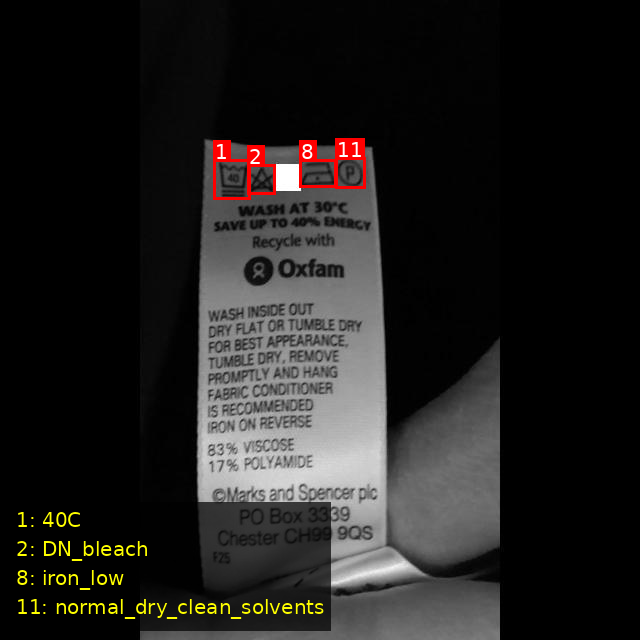

In [ ]:
image_annotated = draw_YOLO_boxes(image, results)
display(image_annotated)